## Quiz; Backpropagation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)
        
    plt.plot(X,Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both',labelsize=14)

## Implement backpropagtaion

### generate data

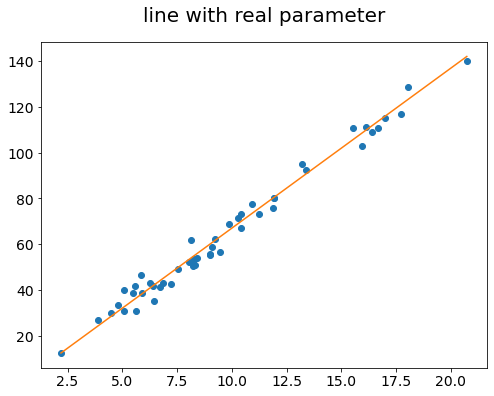

In [3]:
N = 50

x = tf.random.normal([N], 10, 5)
y = 7 * x - 3 + tf.random.normal([N], 0, 4)
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl,7*x_fl-3,str_title="line with real parameter")

### define function -1

In [4]:
def relu(x):
    if x > 0.0 :
        return x
    else :
        return 0.0

# y = relu(wx+b)
def MSE(x, y, w, b):
    totalError = 0
    for i in range(N):
        x_i = x[i]
        y_i = y[i]
        totalError += (y_i - relu(w * x_i + b)) ** 2
    return totalError / float(N)

- forwarding = MSE함수를 통해 loss를 구하는 과정    
- backpropagation = loss를 가지고 다시 w를 계산하는 과정  
- 반복

### define function for backpropagation

<img src="./image_files/backpropagation.jpg" width = 800 align = "left">

<img src="./image_files/backpropagation_1.jpg" width = 350 align = "left">

In [5]:
def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        
        #forward_propagation
#         f7 = w * x_i
#         f6 = f7 + b
#         f5 = relu(f6)
#         ...
#         f3 = y_i + f4
#      f1 ~ f7 값을 저장해놓고 backpropagation에서 저장된 값을 이용
        
        dL_df1 = 1.0
        dL_df2 = dL_df1 * (1/float(N))                   # 미분하면 1/N이 남게됨
        dL_df3 = dL_df2 * 2.0 * (y_i - relu(w*x_i+b))    # 
        dL_df4 = dL_df3 * 1.0          # 더하기는 * 1.0으로 바뀜
        dL_df5 = dL_df4 * (-1.0)       #
        if (w * x_i) + b > 0.0 :
            dL_df6 = dL_df5 * 1.0
        else :
            dL_df6 = dL_df5 * 0.0      #
        b_gradient += dL_df6 * 1.0     # b_gradient += dL_df5 * 1.0 가 아닙니다. 오타입니다ㅠㅠ!
        dL_df7 = dL_df6 * 1.0          # 더하기는 * 1.0으로 바뀜
        w_gradient += dL_df7 * x_i     #
    return [w_gradient, b_gradient]

In [ ]:
def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    
    dL_df1 = np.ones(N)
    dL_df2 = dL_df1 * (1/float(N))
    dL_df3 = dL_df2 * 2 * (y-relu(w*x+b))
    dL_df4 = dL_df3 * 1.0
    dL_df5 = dL_df4 * -1.0
    dL_df6 = np.multiply(dL_df5,(w*x+b>0))
    b_gradient = np.matmul(dL_df6,np.ones(N))
    dL_df7 = dL_df6 *1.0
    w_gradient = np.matmul(dL_df7,x)
    return [w_gradient, b_gradient]

### define function -2

In [6]:
def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)

In [7]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

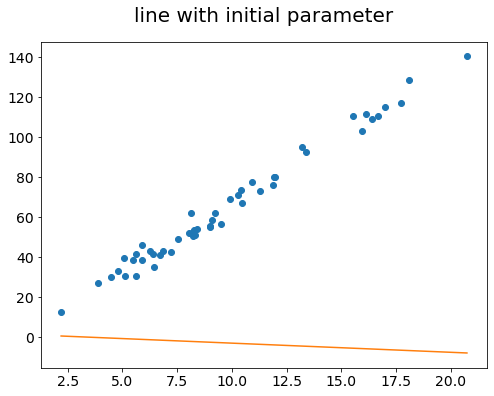

In [8]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with initial parameter")

In [8]:
learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step % display_step == 0:
        loss = MSE(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  [5051.5986] , w:  [-0.4517754] , b:  [1.6963974]
step:  200 , loss:  [16.421673] , w:  [6.607305] , b:  [1.1318733]
step:  400 , loss:  [15.509238] , w:  [6.6894364] , b:  [0.1838991]
step:  600 , loss:  [15.029202] , w:  [6.749009] , b:  [-0.50369763]
step:  800 , loss:  [14.776645] , w:  [6.792219] , b:  [-1.0024341]
step:  1000 , loss:  [14.643774] , w:  [6.8235607] , b:  [-1.3641839]
step:  1200 , loss:  [14.573875] , w:  [6.8462934] , b:  [-1.6265721]
step:  1400 , loss:  [14.537092] , w:  [6.8627825] , b:  [-1.8168904]
step:  1600 , loss:  [14.517752] , w:  [6.8747425] , b:  [-1.9549348]
step:  1800 , loss:  [14.507572] , w:  [6.8834176] , b:  [-2.0550625]


### check learned parameter

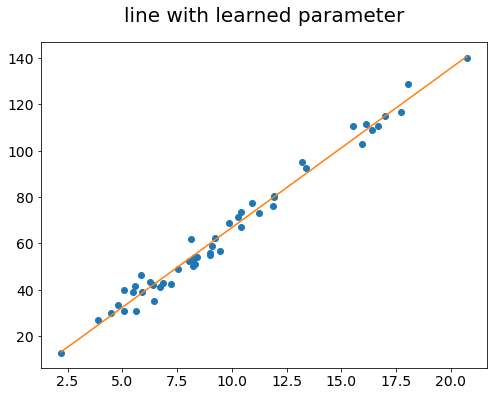

In [9]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with learned parameter")